Hierarchical clustering is an unsupervised machine learning algorithm that seeks to group similar objects into the same cluster. It's called hierarchical clustering because it creates a hierarchy of clusters which can be represented on a tree diagram called a dendrogram.

Here's how it works:

`Initialization`: At the start, each individual object is considered as a single cluster. Hence, if there are N objects, we have N clusters.

`Merging`: The algorithm then merges the two clusters that are closest to each other in terms of a chosen distance metric. This reduces the total number of clusters by one.

`Iterative Process`: Steps 2 is repeated until all objects are in a single cluster.

There are two main types of hierarchical clustering:

`Agglomerative Hierarchical Clustering (bottom-up approach)`: In this approach, we start with individual objects (each considered a single cluster) and combine them iteratively to form larger clusters. This process continues until all objects are in a single cluster or until some stopping criteria are met.

`Divisive Hierarchical Clustering (top-down approach)`: In this approach, we start with one large cluster of all objects and divide or split the clusters iteratively into smaller clusters. This continues until each object forms a single cluster or until some stopping criteria are met.

A key feature of hierarchical clustering is that it doesn't require the user to specify the number of clusters in advance, unlike many other clustering algorithms such as k-means.

Hierarchical clustering can be applied in many areas like recommendation engines, anomaly detection, natural language processing, and bioinformatics for gene analysis, among others.

However, it's important to note that hierarchical clustering can be sensitive to the choice of distance metric and can be computationally expensive for large datasets because at each iteration, distances need to be computed between every pair of clusters.

It's also worth noting that once a decision is made to combine two clusters, it cannot be undone. This may lead to sub-optimal solutions, especially if noise or outliers are present in the data.

In [1]:
# importing all the required libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
label = pd.DataFrame(cancer.target, columns=['Class'])
label.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [7]:
# data = data.assign(target=pd.Series(cancer.target))
# data.head()

In [8]:
data.shape

(569, 30)

In [9]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [11]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

t0=time.time()
model = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
# fit the model to the data
labels = model.fit_predict(data)
t1=time.time()
print(t1-t0)
# print the cluster labels
print(model.labels_)

0.04268908500671387
[1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [12]:
import itertools
import numpy as np
from sklearn.metrics import accuracy_score

def label_permute_compare(ytdf, yp):
    n_labels = len(ytdf['Class'].unique())
    perms = list(itertools.permutations(list(range(n_labels))))
    acc = []
    for i in range(len(perms)):
        mapdict = dict(zip(list(ytdf['Class'].unique()), list(perms[i])))
        yt = ytdf['Class'].apply(lambda x: mapdict[x])
        acc.append(accuracy_score(yt, yp))
    idx = np.argmax(acc)    
    return perms[idx], acc[idx]

In [13]:
# n_labels = len(label['Class'].unique())
# print(n_labels)
# perms = list(itertools.permutations(list(range(n_labels))))
# print(perms)

In [14]:
labelorder, acc = label_permute_compare(label, model.labels_)
print(labelorder, acc)

(1, 0) 0.7785588752196837


0.6291739894551845


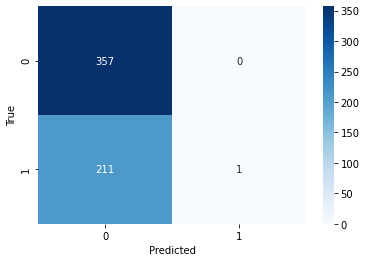

In [18]:
# display confusion matrix here 
# your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns

mapdict = dict(zip(list(label['Class'].unique()),list(labelorder)))
yt = label['Class'].apply(lambda x: mapdict[x])
print(acc)
confusion_matrix(yt,model.labels_)


cm = confusion_matrix(yt, model.labels_)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label['Class'].unique(), yticklabels=label['Class'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# print(accuracy_score(label['Class'], model.labels_))
# cm = confusion_matrix(label['Class'], model.labels_)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label['Class'].unique(), yticklabels=label['Class'].unique())
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [17]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix

# define linkage methods and distance metrics to try
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan', 'cosine']

best_acc = 0
for linkage in linkage_methods:
    for distance in distance_metrics:
        
        try:
            
            # create AgglomerativeClustering object with given linkage and distance metric
            model = AgglomerativeClustering(n_clusters=2, linkage=linkage, affinity=distance)
            # fit the model on the data
            model.fit(data)
            # permute the labels to find the best match with the ground truth labels
            labelorder, acc = label_permute_compare(label, model.labels_)
            # calculate accuracy and confusion matrix
            mapdict = dict(zip(list(label['Class'].unique()),list(labelorder)))
            yt = label['Class'].apply(lambda x: mapdict[x])
            #print(acc)
            confusion_matrix(yt,model.labels_)
            curr_acc = acc
            curr_cm = confusion_matrix(yt, model.labels_)
            print(f"Linkage: {linkage}, Distance: {distance}, Accuracy: {curr_acc}, Confusion Matrix:\n{curr_cm}")
            if curr_acc > best_acc:
                best_acc = curr_acc
                best_cm = curr_cm
                best_linkage = linkage
                best_distance = distance
        except:
            print(linkage, 'with', distance_metrics, 'not allowed.')

print(f"\nBest model - Linkage: {best_linkage}, Distance: {best_distance}, Accuracy: {best_acc}, Confusion Matrix:\n{best_cm}")


Linkage: ward, Distance: euclidean, Accuracy: 0.7785588752196837, Confusion Matrix:
[[357   0]
 [126  86]]
ward with ['euclidean', 'manhattan', 'cosine'] not allowed.
ward with ['euclidean', 'manhattan', 'cosine'] not allowed.
Linkage: complete, Distance: euclidean, Accuracy: 0.6625659050966608, Confusion Matrix:
[[ 20 192]
 [  0 357]]
Linkage: complete, Distance: manhattan, Accuracy: 0.6625659050966608, Confusion Matrix:
[[ 20 192]
 [  0 357]]
Linkage: complete, Distance: cosine, Accuracy: 0.7047451669595782, Confusion Matrix:
[[357   0]
 [168  44]]
Linkage: average, Distance: euclidean, Accuracy: 0.6625659050966608, Confusion Matrix:
[[ 20 192]
 [  0 357]]
Linkage: average, Distance: manhattan, Accuracy: 0.6590509666080844, Confusion Matrix:
[[ 18 194]
 [  0 357]]
Linkage: average, Distance: cosine, Accuracy: 0.6590509666080844, Confusion Matrix:
[[357   0]
 [194  18]]
Linkage: single, Distance: euclidean, Accuracy: 0.6291739894551845, Confusion Matrix:
[[357   0]
 [211   1]]
Linkage